In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SEVERE CYCLONES DATASET

   Year  January: BOB  January: AS  January: Land  January: Total  \
0  1891             0            0              0               0   
1  1892             0            0              0               0   
2  1893             0            0              0               0   
3  1894             0            0              0               0   
4  1895             0            0              0               0   

   February: BOB  February: AS  February: Land  February: Total  \
0              0             0               0                0   
1              0             0               0                0   
2              0             0               0                0   
3              0             0               0                0   
4              0             0               0                0   

   January- February (winter): BOB  ...  December: Land  December: Total  \
0                                0  ...               0                0   
1                             

/home/varun/NC/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/varun/NC/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


      Year  variable  value combined
0     1891         1      0   1891_1
1     1891         2      0   1891_2
2     1891         3      0   1891_3
3     1891         4      0   1891_4
4     1891         5      0   1891_5
5     1891         6      0   1891_6
6     1891         7      0   1891_7
7     1891         8      0   1891_8
8     1891         9      0   1891_9
9     1891        10      0  1891_10
10    1891        11      1  1891_11
11    1891        12      0  1891_12
12    1892         1      0   1892_1
13    1892         2      0   1892_2
14    1892         3      0   1892_3
15    1892         4      1   1892_4
16    1892         5      0   1892_5
17    1892         6      0   1892_6
18    1892         7      0   1892_7
19    1892         8      0   1892_8
20    1892         9      0   1892_9
21    1892        10      0  1892_10
22    1892        11      0  1892_11
23    1892        12      0  1892_12
24    1893         1      0   1893_1
25    1893         2      0   1893_2
2

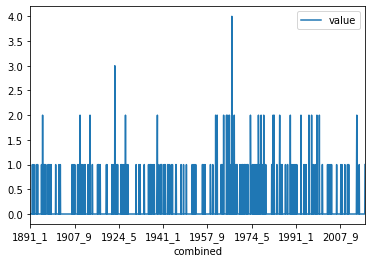

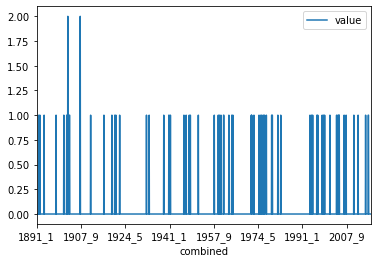

In [2]:
dataframe=pd.read_csv("severe_cyclones.csv")
print(dataframe.head())
bayofbengal=dataframe.filter(regex='BOB')
arabiansea=dataframe.filter(regex='AS')
land=dataframe.filter(regex='Land')

def col_filter(x):
    x.drop(x.columns[x.columns.str.contains(pat = '-')],axis=1,inplace=True)
    for name in x.columns:
        a,b=name.split(':')
        x.rename(columns={name:a},inplace=True)
    x["Year"]=dataframe.Year
    x.rename(columns={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12},inplace=True)
    x=pd.melt(x,id_vars=['Year'])
    x.sort_values(["Year", "variable"], axis=0, ascending=True, inplace=True) 
    x.set_index(["Year","variable"],inplace=True)
    return x

bayofbengal=col_filter(bayofbengal)
arabiansea=col_filter(arabiansea)
land=col_filter(land)


df_BOB=bayofbengal.reset_index()
df_BOB['combined']=df_BOB.apply(lambda df_BOB:'%s_%s' % (df_BOB['Year'],df_BOB['variable']),axis=1)
df_BOB.plot(x='combined',y='value',kind='line')


df_AS=arabiansea.reset_index()
df_AS['combined']=df_AS.apply(lambda df_AS:'%s_%s' % (df_AS['Year'],df_AS['variable']),axis=1)
df_AS.plot(x='combined',y='value',kind='line')

print(df_AS)

# El Nino

In [3]:
df1=pd.read_csv('I_ElNino.csv',header=None)
df1_=pd.DataFrame()
df1_[0]=df1[0].astype(str)
df1_=pd.DataFrame(df1_[0].str.split('.',1).tolist(),columns=[0,2])
df1_[1]=df1[1]
df1_[2][df1_[2]=='0']='1'
df1_[2][df1_[2]=='0834']='2'
df1_[2][df1_[2]=='1666']='3'
df1_[2][df1_[2]=='25']='4'
df1_[2][df1_[2]=='3334']='5'
df1_[2][df1_[2]=='4166']='6'
df1_[2][df1_[2]=='5']='7'
df1_[2][df1_[2]=='5834']='8'
df1_[2][df1_[2]=='6666']='9'
df1_[2][df1_[2]=='75']='10'
df1_[2][df1_[2]=='8334']='11'
df1_[2][df1_[2]=='9166']='12'

df1_['combined']=df1_.apply(lambda df1_:'%s_%s' % (df1_[0],df1_[2]),axis=1)

df1_.rename(columns={0:'Year'},inplace=True)
df1_.rename(columns={2:'variable'},inplace=True)
df1_.rename(columns={1:'value'},inplace=True)


df1_[['Year', 'variable']] = df1_[['Year', 'variable']].apply(pd.to_numeric) 
print(df1_.dtypes)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

Year          int64
variable      int64
value       float64
combined     object
dtype: object


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be s

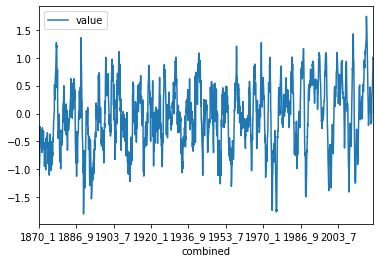

In [4]:
df1_.plot(x='combined',y='value',kind='line')

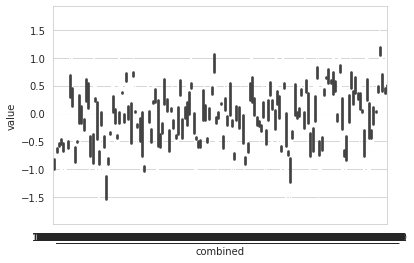

In [5]:
sns.set_style('whitegrid')
splot1=sns.barplot(x='combined',y='value',data=df1_)

# Dipole Index

In [6]:
df2=pd.read_csv('I_DipoleIndex.csv',header=None)
df2_=pd.DataFrame()

df2=pd.melt(df2,id_vars=[0])
df2.rename(columns={'variable':1},inplace=True)

df2['combined']=df2.apply(lambda df2:'%d_%d' % (df2[0],df2[1]),axis=1)
df2.rename(columns={0:'Year'},inplace=True)
df2.rename(columns={1:'variable'},inplace=True)

df2.sort_values(["Year", "variable"], axis=0, ascending=True, inplace=True)
df2.reset_index(inplace=True)
df2.drop(columns='index',inplace=True)
df2_=df2

print(df2_.head(50))
#df2.sort_values(["Year", "variable"], axis=0, ascending=True, inplace=True)
#df2.reset_index(inplace=True)
#df2.drop(columns='index',inplace=True)


    Year  variable     value combined
0   1870         1 -0.257088   1870_1
1   1870         2 -0.157078   1870_2
2   1870         3  0.341333   1870_3
3   1870         4  0.146061   1870_4
4   1870         5 -0.263574   1870_5
5   1870         6 -0.338922   1870_6
6   1870         7 -0.338341   1870_7
7   1870         8 -0.223125   1870_8
8   1870         9 -0.344435   1870_9
9   1870        10 -0.259462  1870_10
10  1870        11 -0.135794  1870_11
11  1870        12 -0.150131  1870_12
12  1871         1 -0.092200   1871_1
13  1871         2  0.009930   1871_2
14  1871         3 -0.047700   1871_3
15  1871         4  0.046500   1871_4
16  1871         5  0.101795   1871_5
17  1871         6  0.046100   1871_6
18  1871         7 -0.132072   1871_7
19  1871         8 -0.076300   1871_8
20  1871         9  0.048100   1871_9
21  1871        10 -0.151351  1871_10
22  1871        11  0.048200  1871_11
23  1871        12 -0.003320  1871_12
24  1872         1  0.143861   1872_1
25  1872    

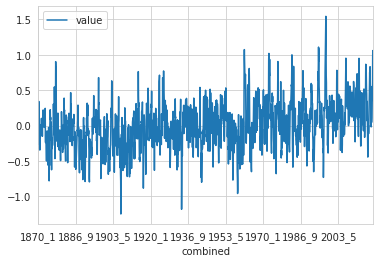

In [7]:
df2_.plot(x='combined',y='value',kind='line')

0.30322392973060586


/home/varun/NC/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


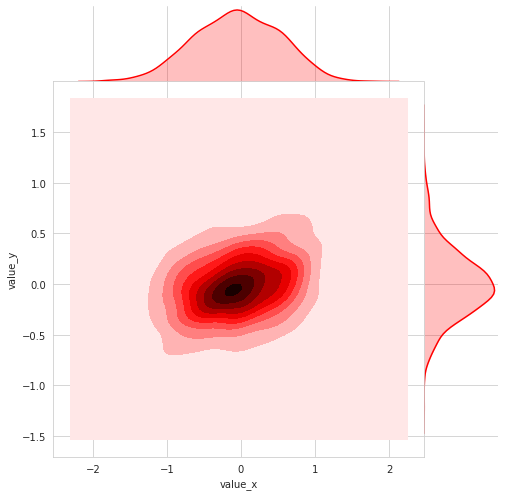

In [8]:
result=pd.merge(df1_,df2_,on=['combined'], how='inner')
x1=pd.Series(result['value_x'])
x2=pd.Series(result['value_y'])
print(result['value_x'].corr(result['value_y']))

example_three=sns.jointplot(x1,x2,kind='kde',size=7,space=0,color='r')

# Heat Content (Indian Ocean)

In [9]:
df3=pd.read_csv('I_HeatContent.csv',header=None)
df3_=pd.DataFrame()

df3=pd.melt(df3,id_vars=[0])
df3.rename(columns={'variable':1},inplace=True)

df3['combined']=df3.apply(lambda df3:'%d_%d' % (df3[0],df3[1]),axis=1)
df3.rename(columns={0:'Year'},inplace=True)
df3.rename(columns={1:'variable'},inplace=True)

df3.sort_values(["Year", "variable"], axis=0, ascending=True, inplace=True)
df3.reset_index(inplace=True)
df3.drop(columns='index',inplace=True)
df3_=df3

print(df3.head())


   Year  variable     value combined
0  1955         1 -0.341465   1955_1
1  1955         2 -0.341465   1955_2
2  1955         3 -0.341465   1955_3
3  1955         4 -0.640083   1955_4
4  1955         5 -0.640083   1955_5


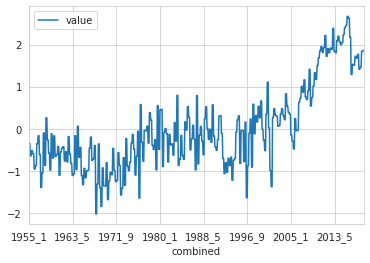

In [10]:
df3_.plot(x='combined',y='value',kind='line')

0.12987063374957056


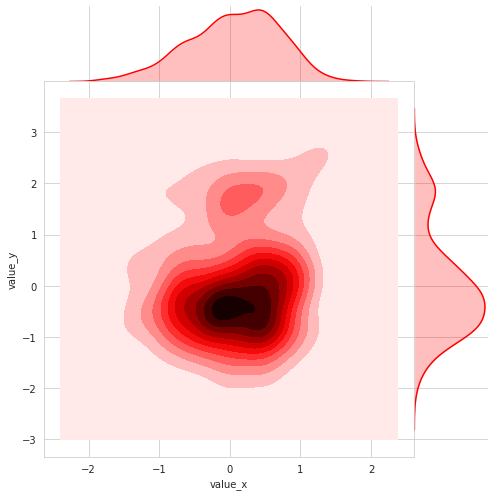

In [11]:
result=pd.merge(df1_,df3_,on=['combined'], how='inner')
x1=pd.Series(result['value_x'])
x2=pd.Series(result['value_y'])
print(result['value_x'].corr(result['value_y']))

example_three=sns.jointplot(x1,x2,kind='kde',size=7,space=0,color='r')

# Indian Rainfall 

In [12]:
df4=pd.read_csv('I_IndianRainfall.csv',header=None)
df4_=pd.DataFrame()

df4=pd.melt(df4,id_vars=[0])
df4.rename(columns={'variable':1},inplace=True)

df4['combined']=df4.apply(lambda df4:'%d_%d' % (df4[0],df4[1]),axis=1)
df4.rename(columns={0:'Year'},inplace=True)
df4.rename(columns={1:'variable'},inplace=True)

df4.sort_values(["Year", "variable"], axis=0, ascending=True, inplace=True)
df4.reset_index(inplace=True)
df4.drop(columns='index',inplace=True)
df4_=df4

print(df4.head(5000))


      Year  variable  value combined
0     1871         1   19.6   1871_1
1     1871         2   10.7   1871_2
2     1871         3   14.5   1871_3
3     1871         4   33.9   1871_4
4     1871         5   63.6   1871_5
5     1871         6  208.0   1871_6
6     1871         7  277.8   1871_7
7     1871         8  179.4   1871_8
8     1871         9  183.6   1871_9
9     1871        10   36.8  1871_10
10    1871        11   32.4  1871_11
11    1871        12    6.7  1871_12
12    1872         1    7.6   1872_1
13    1872         2    7.5   1872_2
14    1872         3    7.3   1872_3
15    1872         4   24.0   1872_4
16    1872         5   43.8   1872_5
17    1872         6  189.2   1872_6
18    1872         7  291.3   1872_7
19    1872         8  245.2   1872_8
20    1872         9  187.9   1872_9
21    1872        10   78.5  1872_10
22    1872        11   27.6  1872_11
23    1872        12   19.1  1872_12
24    1873         1    3.7   1873_1
25    1873         2   13.5   1873_2
2

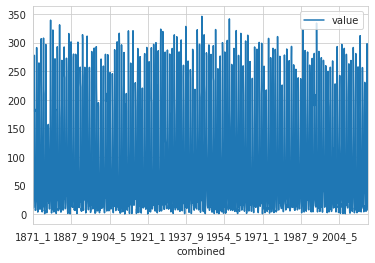

In [13]:
df4_.plot(x='combined',y='value',kind='line')

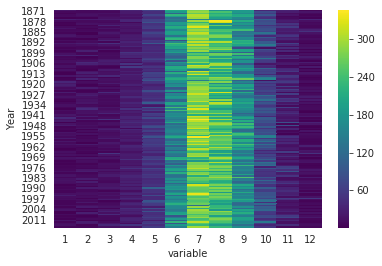

In [14]:
#Rainfall Heatmap
df_temp=df4_.pivot(index='Year',columns='variable',values='value')
sns.heatmap(df_temp,annot=False,fmt="g",cmap='viridis')

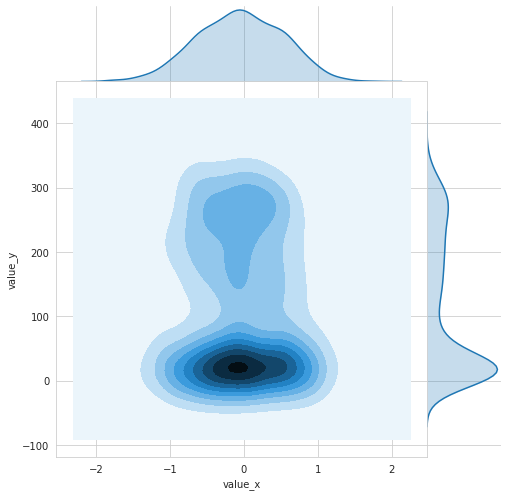

In [15]:
#Indian Rainfall with El Nino  
result=pd.merge(df1_,df4_,on=['combined'], how='inner')
x1=pd.Series(result['value_x'])
x2=pd.Series(result['value_y'])

example_three=sns.jointplot(x1,x2,kind='kde',size=7,space=0)

# Peninsular Rainfall

In [16]:
df5=pd.read_csv('I_IndianRainfall.csv',header=None)
df5_=pd.DataFrame()

df5=pd.melt(df5,id_vars=[0])
df5.rename(columns={'variable':1},inplace=True)

df5['combined']=df5.apply(lambda df5:'%d_%d' % (df5[0],df5[1]),axis=1)
df5.rename(columns={0:'Year'},inplace=True)
df5.rename(columns={1:'variable'},inplace=True)

df5.sort_values(["Year", "variable"], axis=0, ascending=True, inplace=True)
df5.reset_index(inplace=True)
df5.drop(columns='index',inplace=True)
df5_=df5

print(df5.head(5000))


      Year  variable  value combined
0     1871         1   19.6   1871_1
1     1871         2   10.7   1871_2
2     1871         3   14.5   1871_3
3     1871         4   33.9   1871_4
4     1871         5   63.6   1871_5
5     1871         6  208.0   1871_6
6     1871         7  277.8   1871_7
7     1871         8  179.4   1871_8
8     1871         9  183.6   1871_9
9     1871        10   36.8  1871_10
10    1871        11   32.4  1871_11
11    1871        12    6.7  1871_12
12    1872         1    7.6   1872_1
13    1872         2    7.5   1872_2
14    1872         3    7.3   1872_3
15    1872         4   24.0   1872_4
16    1872         5   43.8   1872_5
17    1872         6  189.2   1872_6
18    1872         7  291.3   1872_7
19    1872         8  245.2   1872_8
20    1872         9  187.9   1872_9
21    1872        10   78.5  1872_10
22    1872        11   27.6  1872_11
23    1872        12   19.1  1872_12
24    1873         1    3.7   1873_1
25    1873         2   13.5   1873_2
2

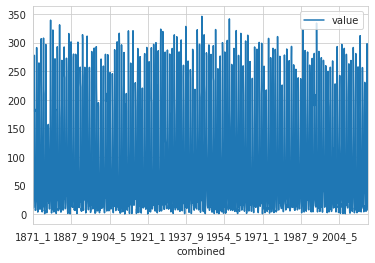

In [17]:
df5_.plot(x='combined',y='value',kind='line')

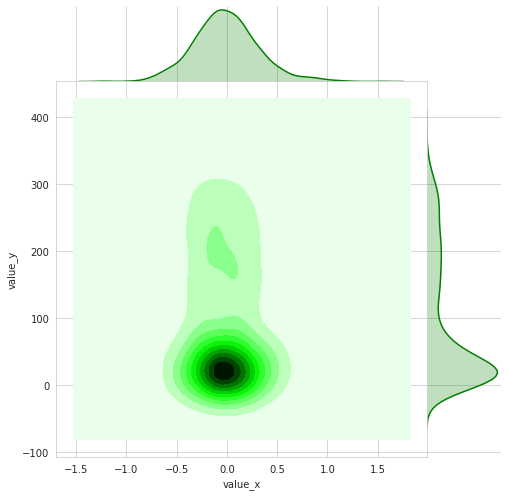

In [18]:
result=pd.merge(df2_,df5_,on=['combined'], how='inner')
x1=pd.Series(result['value_x'])
x2=pd.Series(result['value_y'])

example_three=sns.jointplot(x1,x2,kind='kde',size=7,space=0,color='g')

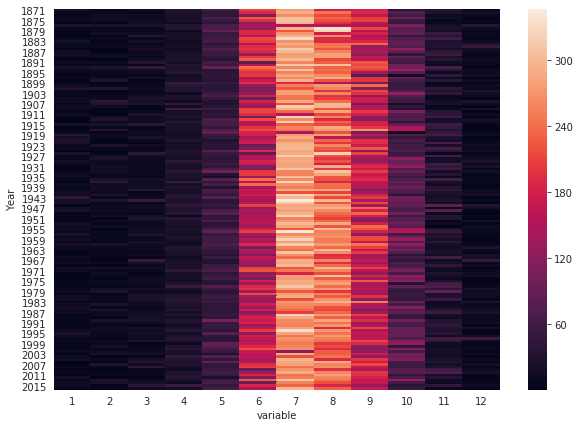

In [19]:
#Rainfall Heatmap
df_temp=df5_.pivot(index='Year',columns='variable',values='value')
plt.figure(figsize = (10,7))
sns.heatmap(df_temp,annot=False,fmt="g")

# IOD

In [20]:
df6=pd.read_csv('I_IOD.csv',header=None)
df6_=pd.DataFrame()

df6['combined']=df6.apply(lambda df6:'%d_%d' % (df6[0],df6[1]),axis=1)
df6.rename(columns={0:'Year'},inplace=True)
df6.rename(columns={1:'variable'},inplace=True)
df6.rename(columns={2:'value'},inplace=True)

df6_=df6

print(df6_.head())

   Year  variable     value combined
0  1958         1  0.193452   1958_1
1  1958         2  0.222633   1958_2
2  1958         3  0.171816   1958_3
3  1958         4 -0.083090   1958_4
4  1958         5 -0.646681   1958_5


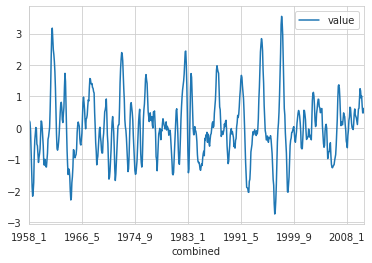

In [21]:
df6_.plot(x='combined',y='value',kind='line')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text xticklabel objects>)

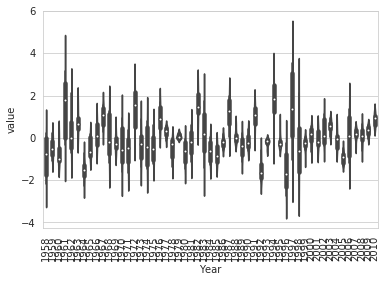

In [22]:
sns.violinplot(x='Year',y='value',data=df6_)
plt.xticks(rotation=90)

# Mean Temperature

In [23]:
df7=pd.read_csv('I_MeanTemp.csv',header=None)

df7=pd.melt(df7,id_vars=[0])
df7.rename(columns={'variable':1},inplace=True)

df7['combined']=df7.apply(lambda df7:'%d_%d' % (df7[0],df7[1]),axis=1)
df7.rename(columns={0:'Year'},inplace=True)
df7.rename(columns={1:'variable'},inplace=True)

df7.sort_values(["Year", "variable"], axis=0, ascending=True, inplace=True)
df7.reset_index(inplace=True)
df7.drop(columns='index',inplace=True)
df7_=df7

print(df7_.head(5000))


     Year  variable     value combined
0    1955         1  0.011400   1955_1
1    1955         2  0.011400   1955_2
2    1955         3  0.011400   1955_3
3    1955         4 -0.010800   1955_4
4    1955         5 -0.010800   1955_5
5    1955         6 -0.010800   1955_6
6    1955         7 -0.010800   1955_7
7    1955         8 -0.010800   1955_8
8    1955         9 -0.010800   1955_9
9    1955        10 -0.017600  1955_10
10   1955        11 -0.017600  1955_11
11   1955        12 -0.017600  1955_12
12   1956         1 -0.033100   1956_1
13   1956         2 -0.033100   1956_2
14   1956         3 -0.033100   1956_3
15   1956         4 -0.026000   1956_4
16   1956         5 -0.026000   1956_5
17   1956         6 -0.026000   1956_6
18   1956         7  0.001010   1956_7
19   1956         8  0.001010   1956_8
20   1956         9  0.001010   1956_9
21   1956        10  0.019200  1956_10
22   1956        11  0.019200  1956_11
23   1956        12  0.019200  1956_12
24   1957         1 -0.00

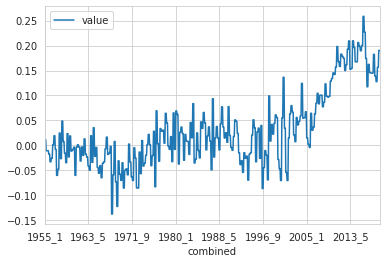

In [24]:
df7_.plot(x='combined',y='value',kind='line')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text xticklabel objects>)

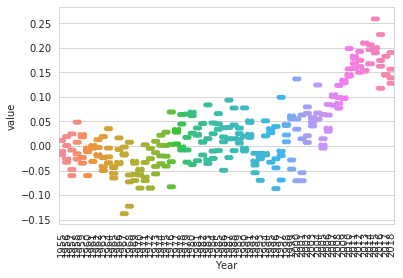

In [25]:
sns.swarmplot(x='Year',y='value',data=df7_)
plt.xticks(rotation=90)

# Southern Annular Mode

In [26]:
df8=pd.read_csv('I_SouthernAnnularMode.csv',header=None)
df8_=pd.DataFrame()

df8=pd.melt(df8,id_vars=[0])
df8.rename(columns={'variable':1},inplace=True)

df8['combined']=df8.apply(lambda df8:'%d_%d' % (df8[0],df8[1]),axis=1)
df8.rename(columns={0:'Year'},inplace=True)
df8.rename(columns={1:'variable'},inplace=True)

df8.sort_values(["Year", "variable"], axis=0, ascending=True, inplace=True)
df8.reset_index(inplace=True)
df8.drop(columns='index',inplace=True)
df8_=df8

print(df8_.head())

   Year  variable  value combined
0  1957         1  -0.87   1957_1
1  1957         2  -2.27   1957_2
2  1957         3   0.07   1957_3
3  1957         4  -1.97   1957_4
4  1957         5  -2.50   1957_5


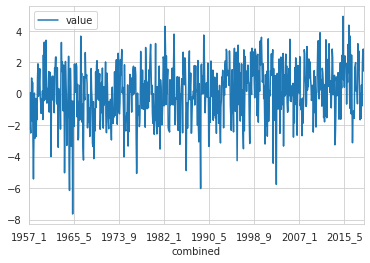

In [27]:
df8_.plot(x='combined',y='value',kind='line')

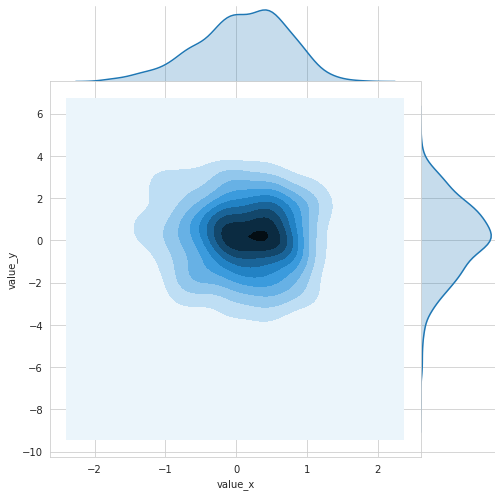

In [28]:
result=pd.merge(df1_,df8_,on=['combined'], how='inner')
x1=pd.Series(result['value_x'])
x2=pd.Series(result['value_y'])

example_three=sns.jointplot(x1,x2,kind='kde',size=7,space=0)

# Southern Oscillation

In [29]:
df9=pd.read_csv('I_SouthernAnnularMode.csv',header=None)
df9_=pd.DataFrame()

df9=pd.melt(df9,id_vars=[0])
df9.rename(columns={'variable':1},inplace=True)

df9['combined']=df9.apply(lambda df9:'%d_%d' % (df9[0],df9[1]),axis=1)
df9.rename(columns={0:'Year'},inplace=True)
df9.rename(columns={1:'variable'},inplace=True)

df9.sort_values(["Year", "variable"], axis=0, ascending=True, inplace=True)
df9.reset_index(inplace=True)
df9.drop(columns='index',inplace=True)
df9_=df9

print(df9.head())

   Year  variable  value combined
0  1957         1  -0.87   1957_1
1  1957         2  -2.27   1957_2
2  1957         3   0.07   1957_3
3  1957         4  -1.97   1957_4
4  1957         5  -2.50   1957_5


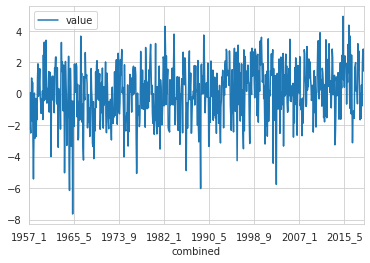

In [30]:
df9_.plot(x='combined',y='value',kind='line')

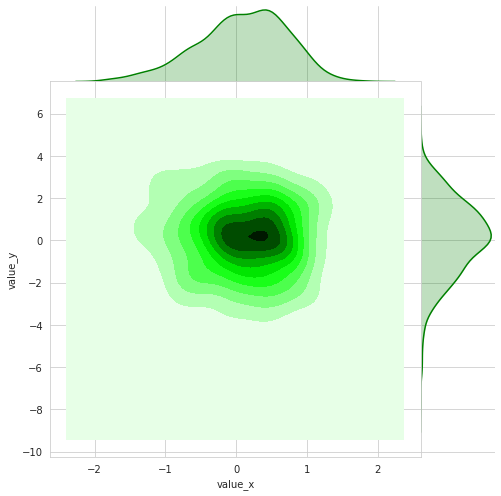

In [31]:
result=pd.merge(df1_,df9_,on=['combined'], how='inner')
x1=pd.Series(result['value_x'])
x2=pd.Series(result['value_y'])
example_three=sns.jointplot(x1,x2,kind='kde',size=7,space=0,color='g')
example_three.savefig('Var.png')

# Creating Final Dataset

In [32]:
df=pd.DataFrame()

df=pd.merge(df1_,df2_,on=['combined','Year','variable'], how='inner')
df.rename(columns={'value_x':'ElNino'},inplace=True)
df.rename(columns={'value_y':'IOD'},inplace=True)

df=pd.merge(df, df3_, on=['combined','Year','variable'], how='inner')
df.rename(columns={'value':'Heat'},inplace=True)

df=pd.merge(df, df5_, on=['combined','Year','variable'], how='inner')
df.rename(columns={'value':'PeninRain'},inplace=True)

df=pd.merge(df, df_BOB, on=['combined','Year','variable'], how='inner')
df.rename(columns={'value':'Cyclones'},inplace=True)

print(df.head())

   Year  variable    ElNino combined       IOD      Heat  PeninRain  Cyclones
0  1955         1 -0.539778   1955_1  0.131523 -0.341465       15.6         0
1  1955         2 -0.846952   1955_2  0.027100 -0.341465        2.9         0
2  1955         3 -0.593552   1955_3  0.183942 -0.341465       12.5         0
3  1955         4 -0.833666   1955_4  0.150401 -0.640083       28.4         0
4  1955         7 -0.781078   1955_7 -0.126821 -0.517221      223.9         0


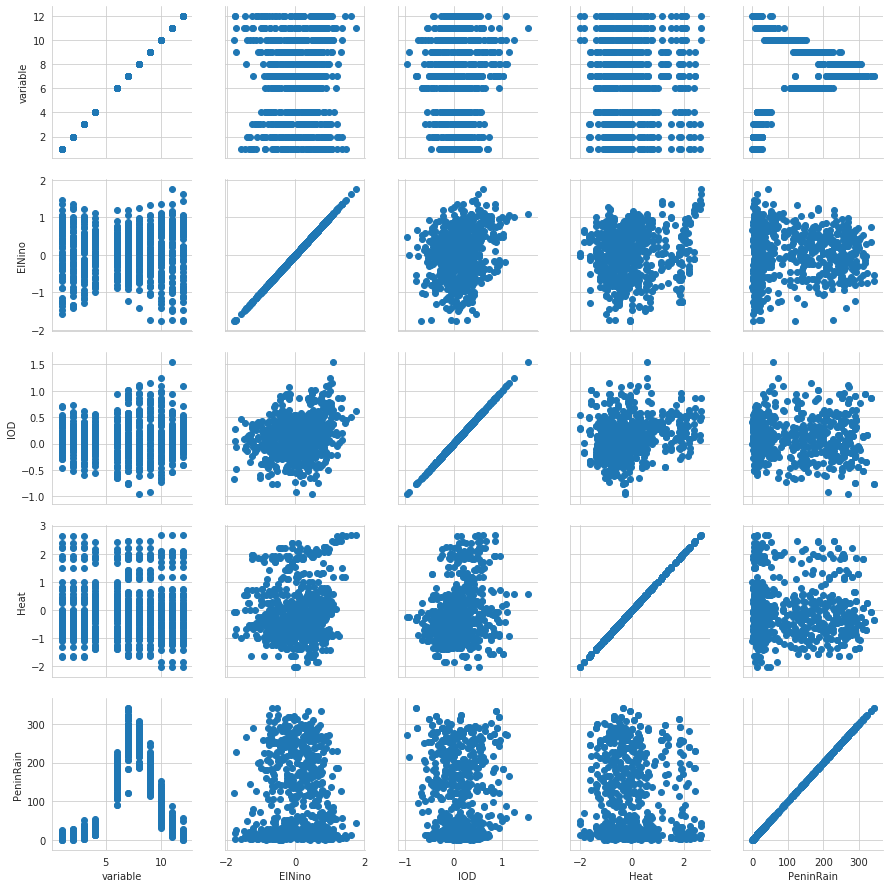

In [33]:
data=df.drop(columns=['Cyclones','Year'])
data.set_index('combined',inplace=True)
target=df['Cyclones']
target = np.array(target).astype(int)
g = sns.PairGrid(data)
g = g.map(plt.scatter)

In [34]:
print(data.describe())

         variable      ElNino         IOD        Heat   PeninRain
count  744.000000  744.000000  744.000000  744.000000  744.000000
mean     6.666667    0.052964    0.113033   -0.059339  107.795430
std      3.426076    0.636782    0.354290    0.967367  105.614128
min      1.000000   -1.769350   -0.960125   -2.021502    0.800000
25%      3.750000   -0.383606   -0.110690   -0.746122   14.075000
50%      7.000000    0.081300    0.100809   -0.243349   51.400000
75%      9.250000    0.519698    0.318489    0.347564  207.450000
max     12.000000    1.748770    1.544235    2.670287  341.500000


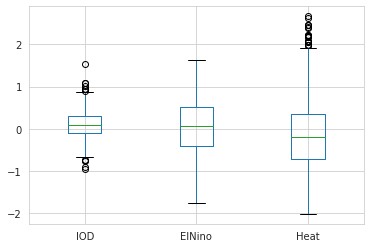

In [35]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(data, target, test_size=1/3.0, random_state=122)

boxplot = train_img.boxplot(column=['IOD', 'ElNino', 'Heat'])

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_img)

train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

print(test_img)

[[-1.04354503  1.58297554 -0.89163515 -0.88661431 -0.90583523]
 [-1.04354503  0.76277745 -0.21986775  0.66557313 -0.77286915]
 [ 1.54876717 -0.01096302 -0.38425423 -0.47735954 -0.77951745]
 ...
 [ 0.6846631   0.48953951  1.06892926 -1.10709034  0.54919355]
 [ 1.54876717  0.01519801  0.78120238  2.30716634 -0.96092117]
 [ 1.54876717 -1.36108389 -0.31222623 -1.1290739  -0.99036366]]


# Predicting the number of Severe Cyclones 

## NUMBER OF DEPRESSIONS

/home/varun/NC/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/varun/NC/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


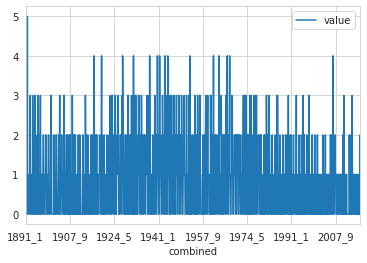

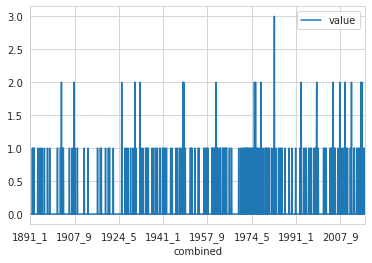

In [37]:
depressn = pd.read_csv('depressions.csv')

bayofbengal_depressn=depressn.filter(regex='BOB')
arabiansea_depressn=depressn.filter(regex='AS')
land_depressn=depressn.filter(regex='Land')

def col_filter(x):
    x.drop(x.columns[x.columns.str.contains(pat = '-')],axis=1,inplace=True)
    for name in x.columns:
        a,b=name.split(':')
        x.rename(columns={name:a},inplace=True)
    x["Year"]=dataframe.Year
    x.rename(columns={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12},inplace=True)
    x=pd.melt(x,id_vars=['Year'])
    x.sort_values(["Year", "variable"], axis=0, ascending=True, inplace=True) 
    x.set_index(["Year","variable"],inplace=True)
    return x

bayofbengal_depressn=col_filter(bayofbengal_depressn)
arabiansea_depressn=col_filter(arabiansea_depressn)
land_depressn=col_filter(land_depressn)



df_BOB_dep=bayofbengal_depressn.reset_index()
df_BOB_dep['combined']=df_BOB_dep.apply(lambda df_BOB_dep:'%s_%s' % (df_BOB_dep['Year'],df_BOB_dep['variable']),axis=1)
df_BOB_dep.plot(x='combined',y='value',kind='line')

df_AS_dep=arabiansea_depressn.reset_index()
df_AS_dep['combined']=df_AS_dep.apply(lambda df_AS_dep:'%s_%s' % (df_AS_dep['Year'],df_AS_dep['variable']),axis=1)
df_AS_dep.plot(x='combined',y='value',kind='line')


/home/varun/NC/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


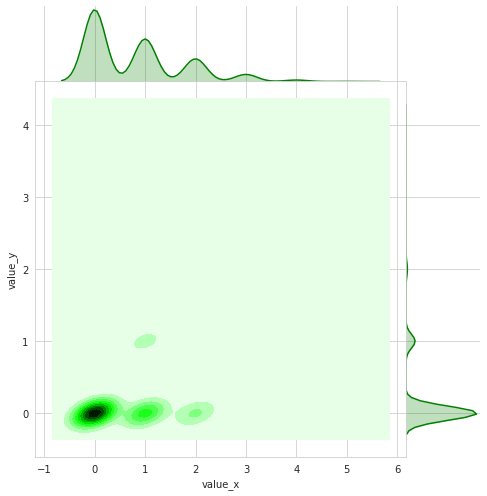

In [38]:
result=pd.merge(df_BOB_dep,df_BOB,on=['combined'], how='inner')
x1=pd.Series(result['value_x'])
x2=pd.Series(result['value_y'])

example_three=sns.jointplot(x1,x2,kind='kde',size=7,space=0,color='g')

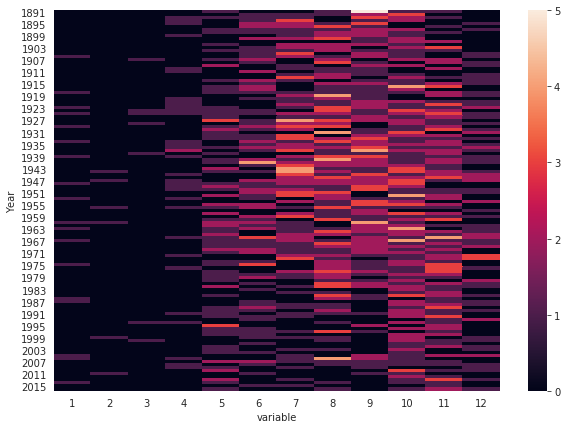

In [39]:
df_temp=df_BOB_dep.pivot(index='Year',columns='variable',values='value')
plt.figure(figsize = (10,7))
sns.heatmap(df_temp,annot=False,fmt="g")

In [40]:
fin=df.copy()

fin=pd.merge(fin, df_BOB_dep, on=['combined','Year','variable'], how='inner')
fin.rename(columns={'value':'Depressions'},inplace=True)

data=fin.drop(columns=['Cyclones','Year'])
data.set_index('combined',inplace=True)
target=fin['Cyclones']
target = np.array(target).astype(int)


## LOGISTIC REGRESSION

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


train_img, test_img, train_lbl, test_lbl = train_test_split(data, target, test_size=1/5, random_state=44)

scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

model = LogisticRegression(solver = 'lbfgs')
model.fit(train_img, train_lbl)


y_pred = model.predict(test_img)
count_misclassified = (test_lbl != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_lbl, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))



Misclassified samples: 18
Accuracy: 0.88


/home/varun/NC/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## NEURAL NETWORK

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix


train_img, test_img, train_lbl, test_lbl = train_test_split(data, target, test_size=1/5, random_state=122)

scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)


mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,10))
mlp.fit(train_img, train_lbl)

predictions = mlp.predict(test_img)
print(confusion_matrix(test_lbl,predictions))

print(classification_report(test_lbl,predictions))

p=np.array([test_img[5]])
x=mlp.predict(p)
print(x[0],test_lbl[5])


[[130   8   0]
 [  6   4   0]
 [  0   0   1]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       138
           1       0.33      0.40      0.36        10
           2       1.00      1.00      1.00         1

    accuracy                           0.91       149
   macro avg       0.76      0.78      0.77       149
weighted avg       0.91      0.91      0.91       149

0 0


/home/varun/NC/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [84]:
data=fin.drop(columns=['Cyclones','Year','variable'])
data.set_index('combined',inplace=True)
target=fin['Cyclones']
target = np.array(target).astype(int)

print(data.columns)

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(data)

pca.explained_variance_ratio_

Index(['ElNino', 'IOD', 'Heat', 'PeninRain', 'Depressions'], dtype='object')


array([9.99801977e-01, 9.26868597e-05])

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


train_img, test_img, train_lbl, test_lbl = train_test_split(data, target, test_size=1/5, random_state=44)

scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

model = LogisticRegression(solver = 'lbfgs')
model.fit(train_img, train_lbl)


y_pred = model.predict(test_img)
count_misclassified = (test_lbl != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_lbl, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix


train_img, test_img, train_lbl, test_lbl = train_test_split(data, target, test_size=1/5, random_state=122)

scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)


mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,10))
mlp.fit(train_img, train_lbl)

predictions = mlp.predict(test_img)
print(confusion_matrix(test_lbl,predictions))

print(classification_report(test_lbl,predictions))

p=np.array([test_img[5]])
x=mlp.predict(p)
print(x[0],test_lbl[5])



/home/varun/NC/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Misclassified samples: 18
Accuracy: 0.88
[[133   5   0]
 [  6   4   0]
 [  0   1   0]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       138
           1       0.40      0.40      0.40        10
           2       0.00      0.00      0.00         1

    accuracy                           0.92       149
   macro avg       0.45      0.45      0.45       149
weighted avg       0.91      0.92      0.92       149

0 0


/home/varun/NC/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/varun/NC/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
